## Welcome to Day 11 - Homework!

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [234]:
df = pd.read_csv('housepricesdata.csv')
df

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price
0,Taman Sari Semanggi Apartment 1BR Tower A,1,1,Semanggi,Jakarta Selatan,106.819159,-6.226598,1,43.0,Tower A,23,IDR,96000000
1,Puri Park View Apartment 2BR Semi Furnished,2,1,Kebon Jeruk,Jakarta Barat,106.756061,-6.192081,0,35.0,Tower CB,19,IDR,30000000
2,Metro Park Residence 2BR Fully Furnished,2,1,Kedoya,Jakarta Barat,106.757651,-6.186415,1,53.0,Tower Milan,22,IDR,70000000
3,Pondok Indah Golf Apartment 2BR View Golf Area,2,2,Pondok Indah,Jakarta Selatan,106.784600,-6.272637,1,85.0,Tower -,24,IDR,576000000
4,Season City Apartment 2BR Tower C,2,1,Grogol,Jakarta Barat,106.796056,-6.153652,0,48.0,Tower C,15,IDR,32000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5298,Grand Centerpoint Apartment 2BR View pool,2,1,Pekayon,Bekasi,106.993400,-6.243400,1,36.0,Tower c,14,IDR,36000000
5299,Roseville SOHO & Suites Studio Fully Furnished,0,1,BSD City,Tangerang,106.664000,-6.294400,1,32.0,Tower East,16,IDR,60000000
5300,Setiabudi Residence 2BR Fully Furnished,2,1,Setiabudi,Jakarta Selatan,106.829330,-6.216540,1,83.0,Tower B,21,IDR,250000000
5301,Apartemen Semanggi 2BR Tower 1,2,1,Slipi,Jakarta Pusat,106.801738,-6.202296,1,68.0,Tower 1,24,IDR,108000000


Penjelasan:
1. Unit_Name: Nama Unit Apartmen
2. No_Rooms: Jumlah bedrooms
3. Bathroom: Jumlah kamar mandi
4. Locality: Daerah
5. Region: Kota/Kabupaten
6. Longitude dan Latitude: letak geografis
7. Furnished: 1 jika fully furnished, 0 jika non-furnished
8. Area: Luas
9. Tower: Lokasi Tower
10. Total_Facilities: Jumlah Total Fasilitas
11. Currency: Mata Uang (USD/IDR)
12. Annual_Price: Harga sewa tahunan (sesuai mata uang)

### Soal:

1. Perhatikan kolom 'Currency' dan 'Annual_Price'. Buatlah kolom baru bernama `CleanedPrice`. Kolom ini dibuat berdasarkan informasi dari 'Annual_Price' dan 'Currency', sehingga harga sewa tahunan di `CleanedPrice` memiliki mata uang yang sama, yaitu IDR (Rupiah). Gunakan Asumsi 1 USD = 15 000 IDR.
2. Analisalah kolom 'No_Rooms' dan 'CleanedPrice'. Apakah ada kejanggalan? Jika ya, nyatakanlah apa yang membuat data-data tersebut janggal. Kemudian, perbaikilah (jika hal tersebut dapat dilakukan). Jika Anda tidak memilih untuk memperbaikinya, maka apa yang sebaiknya dilakukan pada baris-baris tersebut? 
3. Apartemen di Kota/Kabupaten mana yang memiliki rata-rata harga paling tinggi? Buatlah visualisasi untuk mendukung klaim Anda. 
4. Analisalah kolom 'Longitude' dan 'Latitude'. Apakah ada kejanggalan? Jika ya, nyatakanlah apa yang membuat data-data tersebut janggal. Ada kejanggalan yang ***bisa dijelaskan***, sehingga data tersebut meskipun janggal tapi sah-sah saja, dan ada pula kejanggalan yang ***salah***, sehingga data tersebut harus diperbaiki. Kejanggalan tipe apa yang muncul di kolom 'Longitude' dan 'Latitude'? Bila kejanggalan tersebut bisa dijelaskan, maka jelaskanlah. Bila kejanggalan tersebut merupakan sebuah kesalahan, maka coba perbaikilah. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5303 entries, 0 to 5302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unit_Name         5302 non-null   object 
 1   No_Rooms          5303 non-null   int64  
 2   Bathroom          5303 non-null   int64  
 3   Locality          5303 non-null   object 
 4   Region            5303 non-null   object 
 5   Longitude         5303 non-null   float64
 6   Latitude          5303 non-null   float64
 7   Furnished         5303 non-null   int64  
 8   Area              5303 non-null   float64
 9   Tower             5303 non-null   object 
 10  Total_Facilities  5303 non-null   int64  
 11  Currency          5303 non-null   object 
 12  Annual_Price      5303 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 538.7+ KB


#### Soal 1
1. Perhatikan kolom 'Currency' dan 'Annual_Price'. Buatlah kolom baru bernama `CleanedPrice`. Kolom ini dibuat berdasarkan informasi dari 'Annual_Price' dan 'Currency', sehingga harga sewa tahunan di `CleanedPrice` memiliki mata uang yang sama, yaitu IDR (Rupiah). Gunakan Asumsi 1 USD = 15 000 IDR.
**Solusi: Konversi USD ke IDR dengan membuat kolom baru ('CleanedPrice')**

In [144]:
#Conditional Column, jika USD maka dikali 1500 dan jika IDR maka tidak dikali
df.loc[df['Currency'] =='USD', 'CleanedPrice (IDR)'] = df['Annual_Price'] * 15000
df.loc[df['Currency'] =='IDR', 'CleanedPrice (IDR)'] = df['Annual_Price'] 
df

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price,CleanedPrice (IDR)
0,Taman Sari Semanggi Apartment 1BR Tower A,1,1,Semanggi,Jakarta Selatan,106.819159,-6.226598,1,43.0,Tower A,23,IDR,96000000,96000000.0
1,Puri Park View Apartment 2BR Semi Furnished,2,1,Kebon Jeruk,Jakarta Barat,106.756061,-6.192081,0,35.0,Tower CB,19,IDR,30000000,30000000.0
2,Metro Park Residence 2BR Fully Furnished,2,1,Kedoya,Jakarta Barat,106.757651,-6.186415,1,53.0,Tower Milan,22,IDR,70000000,70000000.0
3,Pondok Indah Golf Apartment 2BR View Golf Area,2,2,Pondok Indah,Jakarta Selatan,106.784600,-6.272637,1,85.0,Tower -,24,IDR,576000000,576000000.0
4,Season City Apartment 2BR Tower C,2,1,Grogol,Jakarta Barat,106.796056,-6.153652,0,48.0,Tower C,15,IDR,32000000,32000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5298,Grand Centerpoint Apartment 2BR View pool,2,1,Pekayon,Bekasi,106.993400,-6.243400,1,36.0,Tower c,14,IDR,36000000,36000000.0
5299,Roseville SOHO & Suites Studio Fully Furnished,0,1,BSD City,Tangerang,106.664000,-6.294400,1,32.0,Tower East,16,IDR,60000000,60000000.0
5300,Setiabudi Residence 2BR Fully Furnished,2,1,Setiabudi,Jakarta Selatan,106.829330,-6.216540,1,83.0,Tower B,21,IDR,250000000,250000000.0
5301,Apartemen Semanggi 2BR Tower 1,2,1,Slipi,Jakarta Pusat,106.801738,-6.202296,1,68.0,Tower 1,24,IDR,108000000,108000000.0


#### Soal 2
2. Analisalah kolom 'No_Rooms' dan 'CleanedPrice'. Apakah ada kejanggalan? Jika ya, nyatakanlah apa yang membuat data-data tersebut janggal. Kemudian, perbaikilah (jika hal tersebut dapat dilakukan). Jika Anda tidak memilih untuk memperbaikinya, maka apa yang sebaiknya dilakukan pada baris-baris tersebut? 

In [ ]:
#Pertama kita cari tahu kejanggalan dari data dengan "No_Rooms"
df[(df['No_Rooms'] == 0)]

NameError: name 'df' is not defined

In [141]:
#Kita coba cek outliers menggunakan z-score
import scipy.stats as stats
df[(np.abs(stats.zscore(df["CleanedPrice (IDR)"])) >= 3)]

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price,CleanedPrice (IDR)
1163,Signature Park Grande Studio Fully Furnished,0,1,MT Haryono,Jakarta Timur,106.866201,-6.245201,1,25.0,Tower Green Signature,20,USD,54000000,8.100000e+11


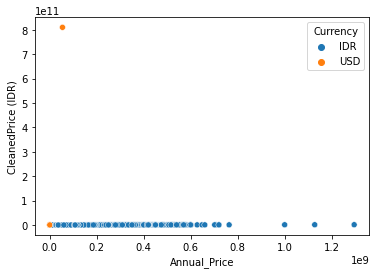

In [143]:
#Kita juga coba cek outliers menggunakan visualisasi data
fig = plt.figure()  
ax = sns.scatterplot(data = df, x='Annual_Price', y = 'CleanedPrice (IDR)',hue='Currency')
plt.show() 

Diketahui bahwa ternyata terdapat satu data dengan Currency yang seharusnya adalah IDR disamping USD. Hal ini mengakibatkan nilai yang tinggi pada kolom CleanedPrice (IDR)\
Solusinya adalah dengan membuat conditional statement, yaitu jika nilai CleanedPrice lebih tinggi dari 10 Milliar, maka nilainya dikembalikan ke Annual Price.

In [145]:
df.loc[df['CleanedPrice (IDR)'] > 1e+10, 'CleanedPrice (IDR)'] = df['Annual_Price']
df[(df['No_Rooms'] == 0)&(df['Currency']=='USD')]

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price,CleanedPrice (IDR)
1163,Signature Park Grande Studio Fully Furnished,0,1,MT Haryono,Jakarta Timur,106.866201,-6.245201,1,25.0,Tower Green Signature,20,USD,54000000,54000000.0
3880,Kemang Village Apartment Studio Fully Furnished,0,1,Kemang,Jakarta Selatan,106.811453,-6.259374,1,43.0,Tower Intercon,21,USD,14400,216000000.0


#### Soal no 3
3. Apartemen di Kota/Kabupaten mana yang memiliki rata-rata harga paling tinggi? Buatlah visualisasi untuk mendukung klaim Anda.

In [180]:
x=pd.pivot_table(df, values = 'CleanedPrice (IDR)', index = ['Region'], aggfunc = np.mean)

In [182]:
x.sort_values(by='CleanedPrice (IDR)', ascending=False)

,CleanedPrice (IDR)
Region,
Jakarta Selatan,1.758484e+08
Jakarta Pusat,1.057522e+08
Jakarta Barat,7.317143e+07
Batam,7.200000e+07
Bandung,6.551515e+07
Jakarta Utara,6.139668e+07
Jogjakarta,6.000000e+07
Makassar,6.000000e+07
Bogor,5.833333e+07


Text(0, 0.5, 'Price')

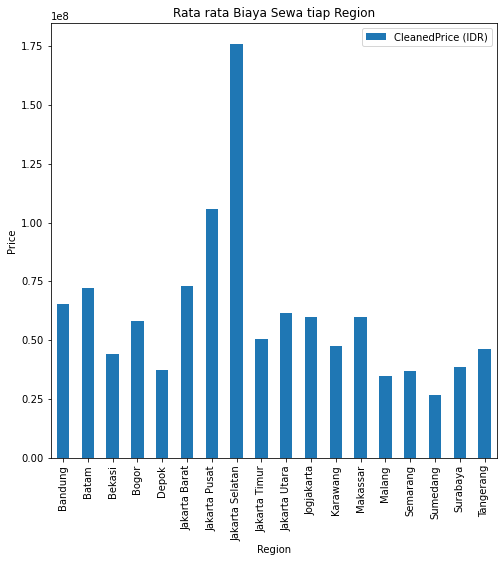

In [184]:
x.plot(kind='bar', figsize=(8,8))
plt.title ("Rata rata Biaya Sewa tiap Region")
plt.xlabel('Region')
plt.ylabel('Price')

### Soal no 4
4. Analisalah kolom 'Longitude' dan 'Latitude'. Apakah ada kejanggalan? Jika ya, nyatakanlah apa yang membuat data-data tersebut janggal. Ada kejanggalan yang ***bisa dijelaskan***, sehingga data tersebut meskipun janggal tapi sah-sah saja, dan ada pula kejanggalan yang ***salah***, sehingga data tersebut harus diperbaiki. Kejanggalan tipe apa yang muncul di kolom 'Longitude' dan 'Latitude'? Bila kejanggalan tersebut bisa dijelaskan, maka jelaskanlah. Bila kejanggalan tersebut merupakan sebuah kesalahan, maka coba perbaikilah. 

In [235]:
#Pertama kita cek kejanggalan/outliers nya
df[(np.abs(stats.zscore(df["Latitude"])) >= 3)]

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price
246,Sejahtera Family Apartment 2BR Fully Furnished,2,1,Sleman,Jogjakarta,110.393900,-7.773700,1,45.0,Tower A,12,IDR,60000000
803,Soekarno Hatta Malang Apartment Studio Fully F...,0,1,Malang,Malang,112.616900,-7.949100,1,24.0,Tower 1,14,IDR,35000000
826,Best Western Mangga Dua Studio View City,0,1,Mangga Dua,Jakarta Pusat,106.827261,6.139958,1,33.0,Tower 1,18,IDR,48000000
951,B Residence BSD 1BR Tower lotus,0,1,BSD City,Tangerang,106.638100,6.304300,1,26.0,Tower lotus,20,IDR,40000000
1140,B Residence BSD Studio Non Furnished,0,1,BSD City,Tangerang,106.638100,6.304300,0,20.0,Tower Rose,17,IDR,40000000
1667,Nagoya Mansion Apartment Studio Tower B,0,1,Lubuk Baja,Batam,104.014900,1.143400,1,28.0,Tower B,12,IDR,72000000
2344,B Residence BSD Studio Fully Furnished,0,1,BSD City,Tangerang,106.638100,6.304300,1,25.0,Tower Tulip,20,IDR,55000000
3143,B Residence BSD Studio Furnished,0,1,BSD City,Tangerang,106.638100,6.304300,1,25.0,Tower Tulip,18,IDR,55000000
3175,B Residence BSD Studio View AEON Mall,0,1,BSD City,Tangerang,106.638100,6.304300,1,22.0,Tower Tulip,18,IDR,45000000
4469,B Residence BSD Studio Furnished,0,1,BSD City,Tangerang,106.638100,6.304300,1,26.0,Tower Tulip,19,IDR,60000000


In [222]:
#Untuk memastikan bahwa data tersebut janggal, kita coba pastikan dengan filter pada region Jakarta Pusat
df[(df['Region']=='Jakarta Pusat')]

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price
5,Green Pramuka City Apartment 2BR Fully Furnished,2,1,Cempaka Putih,Jakarta Pusat,106.873191,-6.187929,1,33.0,Tower Fagio,21,IDR,60000000
6,Springhill Terrace Residence 2BR Fully Furnished,2,1,Kemayoran,Jakarta Pusat,106.850107,-6.149070,1,58.0,Tower OAKWOOD,14,IDR,80000000
9,Green Pramuka City Apartment 2BR Tower Penelope,2,1,Cempaka Putih,Jakarta Pusat,106.873191,-6.187929,0,33.0,Tower Penelope,17,IDR,33000000
22,Thamrin Residence Apartment 1BR Fully Furnished,1,1,Thamrin,Jakarta Pusat,106.816842,-6.197352,1,39.0,Tower B,23,IDR,84000000
26,The Mansion Kemayoran Bougenville 1BR Tower Fo...,1,1,Kemayoran,Jakarta Pusat,106.857160,-6.146070,0,30.0,Tower Fontana,16,IDR,45000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5273,Springhill Terrace Residence 2BR View City (Se...,2,1,Kemayoran,Jakarta Pusat,106.850107,-6.149070,1,60.0,Tower SandalWood,14,IDR,75000000
5281,Menteng Park Studio Fully Furnished,1,1,Menteng,Jakarta Pusat,106.838463,-6.191791,1,40.0,Tower Sapphire,22,IDR,120000000
5288,The Mansion Kemayoran Bougenville 1BR View City,1,1,Kemayoran,Jakarta Pusat,106.857160,-6.146070,0,64.0,Tower Fontana,15,IDR,78000000
5292,Sudirman Park Apartment 2 BR Fully Furnished,2,1,Sudirman,Jakarta Pusat,106.818029,-6.205971,1,48.0,Tower A,24,IDR,90000000


In [223]:
#Ternyata benar bahwa data Latitude Jakarta Pusat adalah janggal. 
#Dengan cara yang sama, didapat jg Tangerang memiliki data yang janggal.
#Solusinya adalah dengan merubah nilai latitude dengan mengalinya dengan (-1)

In [232]:
df.loc[(df['Region'] == 'Jakarta Pusat') & (df['Latitude'] <= 0), 'Latitude'] = df['Latitude'] * -1
df.loc[(df['Region'] == 'Tangerang') & (df['Latitude'] <= 0), 'Latitude'] = df['Latitude'] * -1